# 네이버 지식인 Crawling

In [93]:
from urllib.parse import urlparse
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [94]:
from urllib.parse import quote

In [95]:
# 페이지 당 10개씩의 답변들의 주소를 얻어와 리스트에 저장
driver = webdriver.Chrome('./chromedriver')
keyword = quote('여친 선물')
total_page = 10
ans_url_list = []

for page in range(total_page):
    url = f'https://kin.naver.com/search/list.nhn?query={keyword}&page={page+1}'
    driver.get(url)
    time.sleep(1)
    uls = driver.find_element_by_xpath('//*[@id="s_content"]/div[3]/ul')
    lis = uls.find_elements_by_tag_name('li')
    for li in lis:
        a_tag = li.find_element_by_tag_name('a')
        ans_url = a_tag.get_attribute('href')
        ans_url_list.append(ans_url)
print(len(ans_url_list))

100


- 각 페이지 당 10개씩의 답변들의 주소를 가져옴. 총 10페이지, 총 100개의 질문

In [96]:
# 100개의 각 질문의 답변 개수 세보기
for i, url_ans in enumerate(ans_url_list):
    driver.get(url_ans)
    time.sleep(1)
    ans_cnt = int(driver.find_element_by_class_name('_answerCount.num').text)
    print(f'{i+1}번째 : {ans_cnt}')

1번째 : 12
2번째 : 8
3번째 : 15
4번째 : 11
5번째 : 6
6번째 : 1
7번째 : 6
8번째 : 8
9번째 : 11
10번째 : 6
11번째 : 5
12번째 : 10
13번째 : 1
14번째 : 3
15번째 : 1
16번째 : 4
17번째 : 12
18번째 : 2
19번째 : 4
20번째 : 10
21번째 : 7
22번째 : 2
23번째 : 6
24번째 : 2
25번째 : 3
26번째 : 5
27번째 : 7
28번째 : 9
29번째 : 5
30번째 : 1
31번째 : 1
32번째 : 1
33번째 : 4
34번째 : 9
35번째 : 4
36번째 : 6
37번째 : 13
38번째 : 1
39번째 : 2
40번째 : 16
41번째 : 1
42번째 : 5
43번째 : 1
44번째 : 6
45번째 : 6
46번째 : 11
47번째 : 6
48번째 : 1
49번째 : 5
50번째 : 7
51번째 : 2
52번째 : 11
53번째 : 2
54번째 : 5
55번째 : 6
56번째 : 3
57번째 : 5
58번째 : 8
59번째 : 2
60번째 : 3
61번째 : 11
62번째 : 1
63번째 : 9
64번째 : 26
65번째 : 9
66번째 : 4
67번째 : 2
68번째 : 2
69번째 : 3
70번째 : 2
71번째 : 13
72번째 : 15
73번째 : 3
74번째 : 2
75번째 : 2
76번째 : 2
77번째 : 5
78번째 : 1
79번째 : 8
80번째 : 11
81번째 : 5
82번째 : 2
83번째 : 1
84번째 : 1
85번째 : 5
86번째 : 3
87번째 : 1
88번째 : 10
89번째 : 1
90번째 : 5
91번째 : 2
92번째 : 8
93번째 : 7
94번째 : 2
95번째 : 2
96번째 : 3
97번째 : 2
98번째 : 6
99번째 : 7
100번째 : 5


In [97]:
from tqdm import tqdm_notebook

In [98]:
answer_text = ''
for url_ans in tqdm_notebook(ans_url_list):
    driver.get(url_ans)
    time.sleep(1)
    more = driver.find_element_by_xpath('//*[@id="nextPageButton"]')
    disp = more.get_attribute('style')
    try:
        while disp:
            driver.find_element_by_id('nextPageButton').click()
            time.sleep(1)
    except:
        time.sleep(1)
    answers = driver.find_elements_by_class_name('answer-content__item._contentWrap._answer')
    for ans in answers:
        ps = ans.find_elements_by_tag_name('p')
        for p in ps:
            answer_text += p.text + ' '
driver.close()

In [99]:
print(answer_text)

선물에관한 정보 추천해드릴게요! 클릭!!   이곳을 클릭해보시면 신세계를 느끼실수 있으실 겁니다.   지금껏 보았던 그런 정보와는 차원이 다른 정보의양!!   원하는 정보는 하나붙어 열까지 모두 얻으실수 있으실 꺼에요*.*  위 답변은 답변작성자가 경험과 지식을 바탕으로 작성한 내용입니다. 포인트로 감사할 때 참고해주세요. 2012.01.12. soon**** 님 답변   다이아티니하트 목걸이 추천합니다.   14k하트모양에 다이아 박아져 있꼬 사람들평 장난 아닙니다.   배송도 하루만에 오고요.. 금값올랐는데 가격도 그대로고요...   화장품은 잘못사면 안씁니다..;;ㅋㅋ 위 답변은 답변작성자가 경험과 지식을 바탕으로 작성한 내용입니다. 포인트로 감사할 때 참고해주세요. 2012.01.18. sdlk**** 님 답변 위 답변은 답변작성자가 경험과 지식을 바탕으로 작성한 내용입니다. 포인트로 감사할 때 참고해주세요. 2012.01.18. 추천 님 답변 100만원 밑으로 생각하신다면 에르메스 목걸이 좋은선택이라고 생각해요 정품입니다.  cay.kr  위 답변은 답변작성자가 경험과 지식을 바탕으로 작성한 내용입니다. 포인트로 감사할 때 참고해주세요. 2020.07.21. 열심 비공개 답변 중1 이면 금은방 가셔서 2만원돈 하는 은반지 정도 구입하셔서 주면 좋아라 합니다!   여자는 악세사리에 약하죠^^ 2015.05.06. 비공개 답변 2015.05.01. 비공개 답변 2015.05.01. whj0**** 님 답변 위 답변은 답변작성자가 경험과 지식을 바탕으로 작성한 내용입니다. 포인트로 감사할 때 참고해주세요. 2015.05.01. ksmx**** 님 답변 학생한테 어울리는 목걸이 추천이요 ~~  다이아로티하트 목걸이 추천할게요  엄청 비싼편도 아니고 하트모양에 다이아 박혀있는데 진짜 예뻐요 !!  여자친구분도 받으시면 분명 좋아할거에요 ^^ 위 답변은 답변작성자가 경험과 지식을 바탕으로 작성한 내용입니다. 포인트로 감사할 때 참고해주세요. 2015.05.02.

In [109]:
file = open('./results/NAVER_KIN.txt', 'w', encoding='utf8')
file.write(answer_text)
file.close()

### 워드 클라우드

In [100]:
import nltk
from konlpy.tag import Okt
from konlpy.corpus import kobill

In [101]:
okt = Okt()
tokens_ko = okt.nouns(answer_text)
tokens_ko[:10]

['비공개', '답변', '반지', '목걸이', '루루', '답변', '커플', '가디건', '커플', '모자']

In [102]:
ko = nltk.Text(tokens_ko, name='여친 선물')
len(ko.tokens), len(set(ko.tokens))

(15503, 2240)

In [103]:
# 가장 많이 나온 단어 Top 50
ko.vocab().most_common(50)

[('답변', 847),
 ('선물', 523),
 ('참고', 286),
 ('때', 277),
 ('위', 245),
 ('지식', 237),
 ('작성자', 235),
 ('내용', 235),
 ('포인트', 235),
 ('경험', 233),
 ('바탕', 232),
 ('작성', 232),
 ('목걸이', 227),
 ('추천', 191),
 ('것', 132),
 ('하트', 117),
 ('비공개', 112),
 ('수', 107),
 ('여친', 100),
 ('생각', 87),
 ('가격', 82),
 ('여자친구', 80),
 ('제품', 79),
 ('저', 79),
 ('제', 76),
 ('다이아', 76),
 ('커플', 74),
 ('더', 71),
 ('분', 70),
 ('꽃', 67),
 ('사랑', 65),
 ('세대', 64),
 ('요', 63),
 ('커플링', 61),
 ('아이패드', 58),
 ('사람', 53),
 ('하나', 51),
 ('여자', 51),
 ('한번', 50),
 ('거', 49),
 ('모양', 49),
 ('감동', 49),
 ('사진', 48),
 ('구매', 44),
 ('귀걸이', 44),
 ('인기', 43),
 ('네임카드', 43),
 ('티니', 43),
 ('곳', 42),
 ('디자인', 41)]

In [104]:
stop_words = ['답변', '선물', '때', '참고', '위', '작성자', '지식', '포인트', '경험', '루루', '좀'
              '바탕', '작성', '내용', '추천', '여자친구', '상품', '비공개', '것', '가격', '여친',
              '수', '제품', '더', '구매', '저', '네이버', '통해', '거', '제', '선택', '커플', '습',
              '제공', '파트너', '스', '수수료', '나', '활동', '정말', '쇼핑몰', '등', '판매', '하트',
              '여성', '열심', '여자', '요즘', '한번', '향', '요', '가지', '사이트', '비', '경우',
              '이', '정액', '전', '페이', '조금', '개', '더욱', '곳', '건', '남', '하나', '생각',
              '신지', '몇개', '투척', '채택', '커미션', '지급', '분', '세대', '해', '중', '용', '후',
              '사용', '의미', '가장', '그냥', '때문', '하루', '여', '자', '질문', '남자', '오늘', '은',
              '또', '를', '아주', '꼭', '걸', '검', '알', '점', '게', '속', '거나', '그', '및', '듯',
              '거기', '일단', '도', '역시', '그', '제일', '다른', '님', '로', '날', '바로', '수도',
              '무척', '뭐', '준', '워낙', '토닥토닥', '저희', '얼마나', '또한', '내', '구', '음',
              '바탕', '여러가지', '보', '아시', '좀', '평', '안', '적', '볼', '아래', '이건', '겸']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko[:10]

['반지', '목걸이', '가디건', '모자', '브랜드', '모자', '쇼핑', '도움', '바탕', '샵']

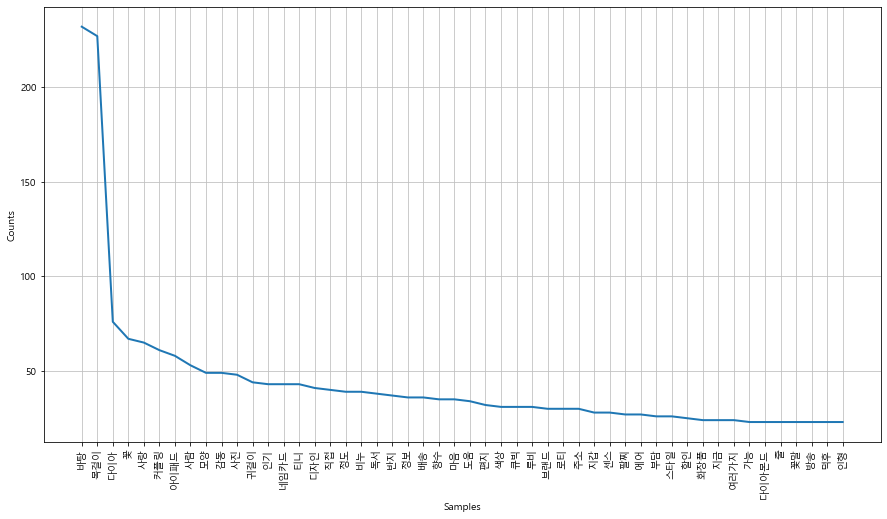

In [105]:
ko = nltk.Text(ko, name='여친 선물')

plt.figure(figsize=(15, 8))
ko.plot(50)
plt.show()

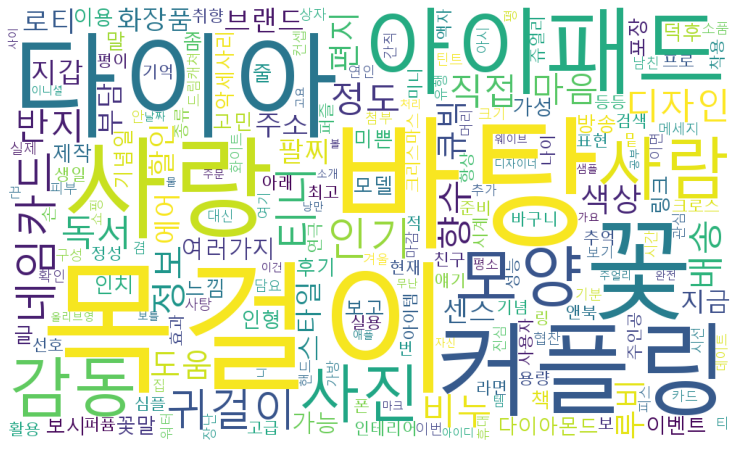

In [106]:
from wordcloud import WordCloud
from PIL import Image
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling=0.2,
                      background_color='white',
                      width=1000, height=600
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

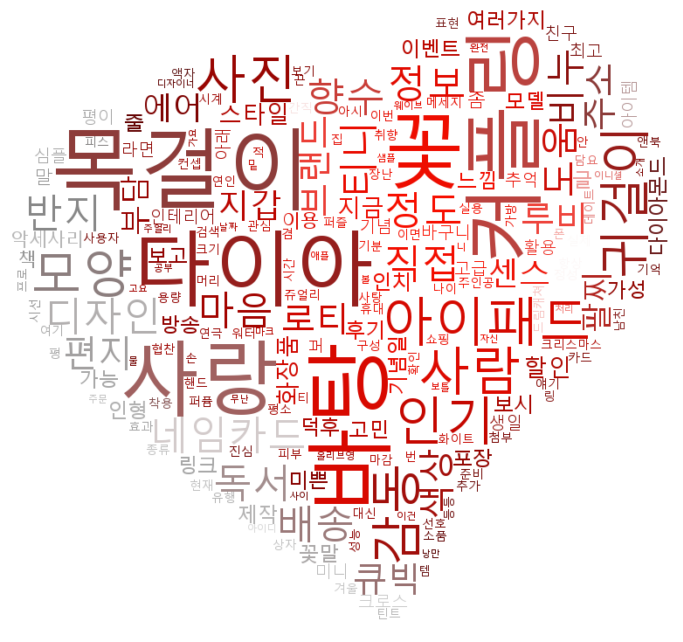

In [107]:
from wordcloud import ImageColorGenerator
mask = np.array(Image.open('./data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling=0.1, mask=mask,
                      background_color='white',
                      min_font_size=1,
                      max_font_size=100
                      ).generate_from_frequencies(dict(data))

plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()